In [4]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using FUSE.IMAS

  Activating environment at `~/.julia/dev/FUSE/Project.toml`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1317


In [5]:
R0 = 1.8
δ = 0.5
ϵ = 0.3
κ = 1.9
B0 = 2.0
qstar = 1.5
beta_t = 0.01

eq0=FUSE.init(IMAS.equilibrium(), 0.0; B0, R0, ϵ, δ, κ, beta_t, qstar)
eq=FUSE.SolovevEquilibriumActor(eq0, 0.0);
FUSE.step(eq; abs_error=1E-4,verbose=false)

SolovevEquilibrium
  B0 = 2.0 [T]
  R0 = 1.8 [m]
  ϵ  = 0.3
  δ  = 0.5
  κ  = 1.9
  α  = 0.7179004068974413
  q⋆ = 1.5
  βp = 0.2521973470361088
  βt = 0.010087893881444352
  σ  = 1
  diverted  = false
  symmetric = true

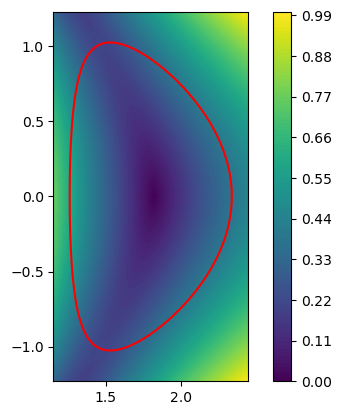

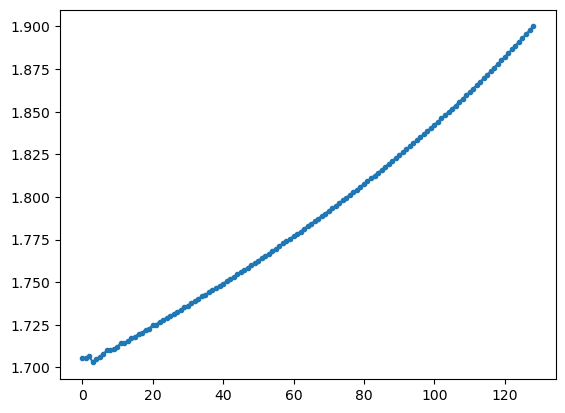

  2.103407 seconds (816.76 k allocations: 1.096 GiB, 4.84% gc time, 9.96% compilation time)


1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7faa85ebb310>

In [225]:
@time eq1=FUSE.finalize(eq,129);

using PyPlot
# using Equilibrium

eqt = eq1.time_slice[1]

Bp=sqrt.(eqt.profiles_2d[1].b_field_z.^2.0.+eqt.profiles_2d[1].b_field_r.^2.0)
CS=PyPlot.contourf(eqt.profiles_2d[1].grid.dim1,
               eqt.profiles_2d[1].grid.dim2,
               transpose(Bp),100)
PyPlot.contour(eqt.profiles_2d[1].grid.dim1,
               eqt.profiles_2d[1].grid.dim2,
               transpose(eqt.profiles_2d[1].psi),levels=[0],colors="r")

PyPlot.gca().set_aspect("equal")

PyPlot.colorbar(CS)
#eq0
PyPlot.figure()
PyPlot.plot(eqt.profiles_1d.elongation,".-")

In [116]:
using Interpolations
tmp=Interpolations.interpolate((eqt.profiles_2d[1].grid.dim1,eqt.profiles_2d[1].grid.dim2), eqt.profiles_2d[1].psi, Gridded(Linear()))
Interpolations.gradient(tmp, 2.0,0.0)

2-element StaticArrays.SVector{2, Float64} with indices SOneTo(2):
 -0.18110284031804724
  0.004854575845003661

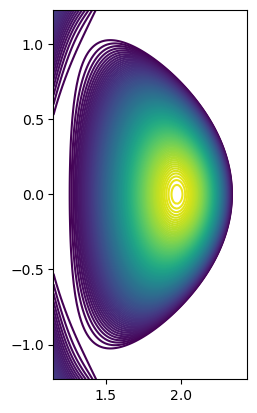

In [137]:
using Equilibrium
psi=Equilibrium.psi_limits(eq.S)
psi=collect(range(psi[1],psi[end],length=100))
psin=collect(range(0.0,1.0,length=length(psi)))
p=Equilibrium.pressure(eq.S,psi)
pprime=Equilibrium.pressure_gradient(eq.S,psi)
f=Equilibrium.poloidal_current(eq.S,psi)
fprime=Equilibrium.poloidal_current_gradient(eq.S,psi)
mu0 = 4*pi*1e-7

function Psi(M::AbstractEquilibrium, dx=0.01,dy=0.01)
    xlims, ylims = limits(M)
    x = range(xlims...,step=dx)
    y = range(ylims...,step=dy)
    return collect(x),collect(y),[M(xx,yy) for xx in x, yy in y]
end

levels=sort(range(Equilibrium.psi_limits(eq.S)...,length=110))

x,y,PSI=Psi(eq.S)
PyPlot.contour(x,y,transpose(PSI),tmp)
PyPlot.gca().set_aspect("equal")
#PyPlot.plot(psin,f.*fprime)

In [22]:
using Printf
digits = -Int(log10(1E-9))
txt = "α=%3.$(digits)f β_t=%3.$(digits)e precision=%3.$(digits)e\n"

@printf(txt, 1,2,3)

LoadError: LoadError: MethodError: no method matching Printf.Format(::Int64)
[0mClosest candidates are:
[0m  Printf.Format(::S, [91m::Vector{UnitRange{Int64}}[39m, [91m::T[39m) where {S, T} at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Printf/src/Printf.jl:64
[0m  Printf.Format([91m::AbstractString[39m) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Printf/src/Printf.jl:80
in expression starting at In[22]:5